
## CNN GAN MNIST


In [1]:

## !pip install numpy
## !pip install pandas
## !pip install matplotlib


In [2]:


import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image


In [3]:


class View(nn.Module):
    
    def __init__(self, shape):
        
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)
     


In [4]:

class MnistDataset(Dataset):
    
   
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        self.data_df = self.data_df.drop(labels=[0], axis=0)
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
    
        ## self.n_samples = 60000
        self.n_samples = len(self.data_df)
        
    
    def __len__(self):
        
        return len(self.data_df)
    
 
    def convert_data_to_tensors(self):
        
         for index in range(self.n_samples):
             # image target (label)
             label = self.data_df.iloc[index, 0]
             target = torch.zeros((10))
             target[ int(label) ] = 1.0

             # image data, normalised from 0-255 to 0-1
             image_values = torch.FloatTensor(  self.data_df.iloc[index, 1:].values.astype(float)  ) / 255.0
        
             self.labels.append(           label              )
             self.tensor_imgs.append(      image_values       )
             self.one_hot_classes.append(  target             )

                
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        print(img.shape)
        label = str( self.data_df.iloc[index,0] )
        img = img.astype(float)
      
        return img, label
    
  



In [5]:

mnist_dataset_train = MnistDataset('data/mnist/mnist_train.csv')   


/Users/user/opt/anaconda3/envs/py37_new_GANs_Torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245

In [6]:

my_img, label = mnist_dataset_train.plot_image(17)


(28, 28)


In [7]:

mnist_dataset_train.data_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


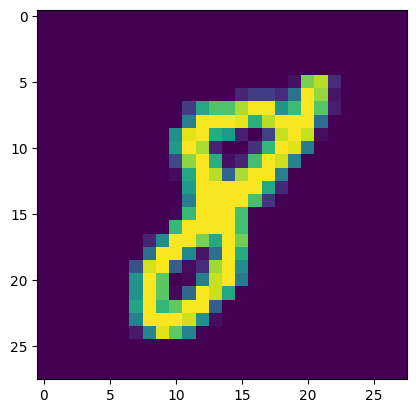

8


In [8]:

plt.imshow(my_img)
plt.show()
print(label)


In [9]:

mnist_dataset_train.convert_data_to_tensors()


In [10]:


class Classifier(nn.Module):
    
    def __init__(self):
        
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            # expand 1 to 10 filters
            nn.Conv2d(1, 10, kernel_size=5, stride=2),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(10),
        
            # 10 filters to 10 filters
            nn.Conv2d(10, 10, kernel_size=3, stride=2),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(10),
            
            # simple feed forward layer
            View(250),
            nn.Linear(250, 10),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters())

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass
     


In [11]:

%%time 
# create neural network

C = Classifier()

# train network on MNIST data set

epochs = 3

for i in range(epochs):
    
    print('training epoch', i+1, "of", epochs)
    for i in range(mnist_dataset_train.n_samples):
        
        label             = mnist_dataset_train.labels[i]
        image_data_tensor = mnist_dataset_train.tensor_imgs[i]
        target_tensor     = mnist_dataset_train.one_hot_classes[i]
    
  
        C.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)
  
     


training epoch 1 of 3


[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 2min 50s, sys: 10.2 s, total: 3min
Wall time: 2min 58s


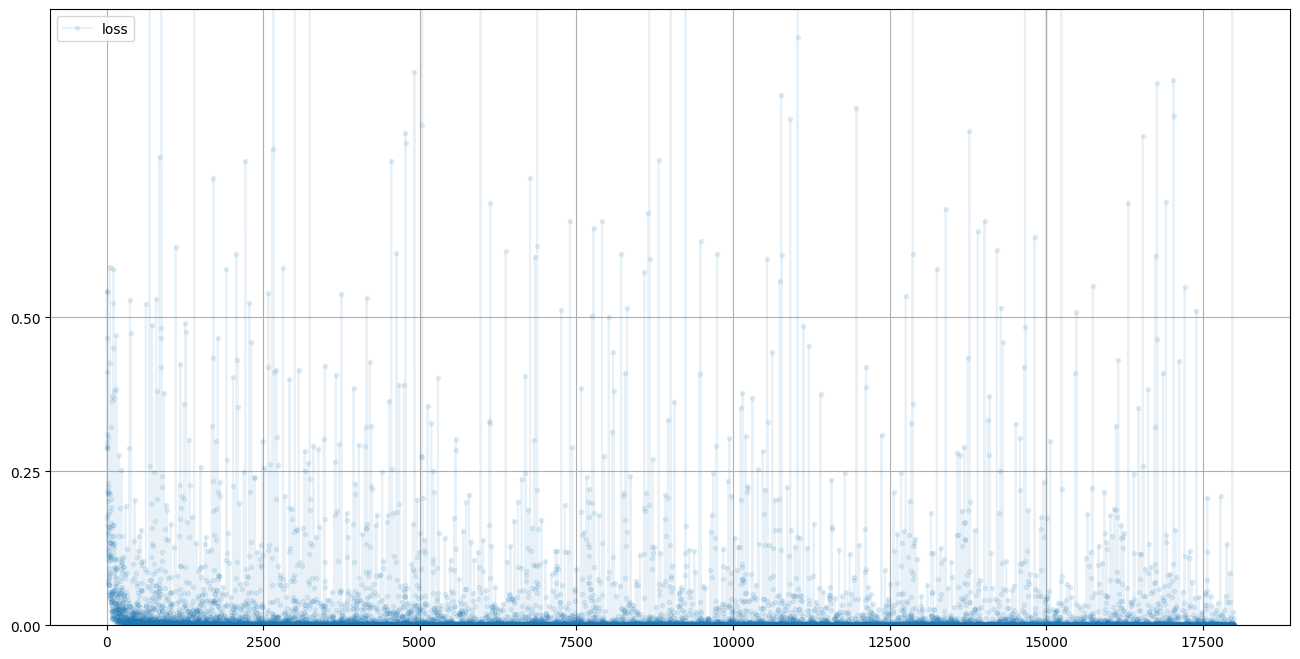

In [12]:

# plot classifier error

C.plot_progress()


In [13]:


# load MNIST test data

mnist_test_dataset = MnistDataset('data/mnist/mnist_test.csv')


/Users/user/opt/anaconda3/envs/py37_new_GANs_Torch/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245

In [17]:

# pick a record
record = 13


my_img, label = mnist_test_dataset.plot_image(record)


(28, 28)


In [18]:

mnist_test_dataset.data_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


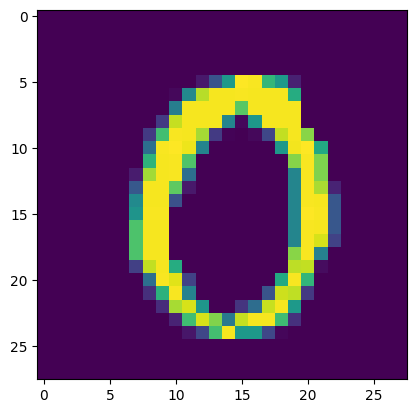

0


In [19]:

plt.imshow(my_img)
plt.show()
print(label)


In [22]:


mnist_test_dataset.convert_data_to_tensors()


In [24]:


image_data =  mnist_test_dataset.tensor_imgs[record]
      


In [25]:

# query from trained network
output = C.forward(image_data.view(1,1,28,28))


<AxesSubplot:>

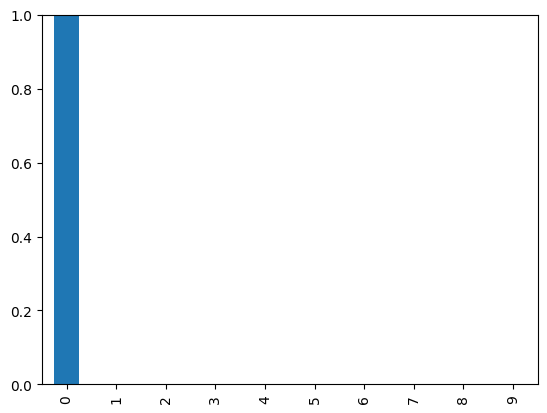

In [26]:


pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))



In [27]:

# test trained neural network on training data

score = 0
items = 0


for i in range(mnist_test_dataset.n_samples):
    label             = mnist_test_dataset.labels[i]
    image_data_tensor = mnist_test_dataset.tensor_imgs[i]
    target_tensor     = mnist_test_dataset.one_hot_classes[i]

    answer = C.forward(image_data_tensor.view(1,1,28,28)).detach().numpy()
    if (answer.argmax() == label):
        score += 1
     
    items += 1
    


print(score, items, score/items)
     


8785 10000 0.8785


In [ ]:

## 9814 10000 0.9814
